In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import importlib as imp

# custom module for capstone 2
import cap2tools as c2t
imp.reload(c2t)

Using TensorFlow backend.


<module 'cap2tools' from 'C:\\Users\\Nils\\Documents\\GitHub\\Springboard-Capstone-2-local-yelp\\cap2tools.py'>

In [2]:
# configure GPU memory usage by tensorflow
config = K.tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.90
K.tensorflow_backend.set_session(K.tf.Session(config=config))

In [3]:
# define paths to image directories
photos_path = 'C:/Users/Nils/Documents/GitHub/Springboard-Capstone-2-local-yelp/downsampled/'
train_path = photos_path + 'train'
valid_path = photos_path + 'val'

# build image generators to feed CNN
batch_size = 8
target_size = (224, 224)
shuffle = True
shift = 0.2

# training datagen includes real-time image augmentation
train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                   width_shift_range=shift, 
                                   height_shift_range=shift, 
                                   zoom_range=0.2, 
                                   fill_mode='reflect')

train_batches = train_datagen.flow_from_directory(train_path, 
                                                  target_size=target_size, 
                                                  batch_size=batch_size, 
                                                  shuffle=shuffle)

# validation set datagen
valid_datagen = ImageDataGenerator()

valid_batches = valid_datagen.flow_from_directory(valid_path, 
                                                  target_size=target_size, 
                                                  batch_size=batch_size, 
                                                  shuffle=shuffle)



Found 5435 images belonging to 5 classes.
Found 455 images belonging to 5 classes.


In [4]:
# build model
model = c2t.build_VGG16(width=800, 
                        new_weights=False, 
                        trainable=True, 
                        learning_rate=0.0001, 
                        dropout1=0, 
                        dropout2=0)

In [5]:
# define callbacks
filepath = 'models/downsample_model2.h5'
saver = ModelCheckpoint(filepath,
                        monitor='val_loss',
                        verbose=1,
                        save_best_only=True)

stopper = EarlyStopping(monitor='val_loss', 
                        patience=2, 
                        verbose=1)

# train model
n_epochs = 20

history = model.fit_generator(train_batches, 
                              validation_data=valid_batches,
                              epochs=n_epochs, 
                              verbose=1, 
                              callbacks=[saver, stopper])

Epoch 1/20
680/680 [==============================] - 154s 226ms/step - loss: 0.6370 - acc: 0.7737 - val_loss: 0.3964 - val_acc: 0.8484

Epoch 00001: val_loss improved from inf to 0.39636, saving model to models/downsample_model2.h5
Epoch 2/20
680/680 [==============================] - 148s 218ms/step - loss: 0.4053 - acc: 0.8460 - val_loss: 0.3518 - val_acc: 0.8681

Epoch 00002: val_loss improved from 0.39636 to 0.35176, saving model to models/downsample_model2.h5
Epoch 3/20
680/680 [==============================] - 148s 218ms/step - loss: 0.3638 - acc: 0.8593 - val_loss: 0.3322 - val_acc: 0.8835

Epoch 00003: val_loss improved from 0.35176 to 0.33224, saving model to models/downsample_model2.h5
Epoch 4/20
680/680 [==============================] - 148s 218ms/step - loss: 0.3397 - acc: 0.8684 - val_loss: 0.3139 - val_acc: 0.8835

Epoch 00004: val_loss improved from 0.33224 to 0.31385, saving model to models/downsample_model2.h5
Epoch 5/20
680/680 [==============================] - 14

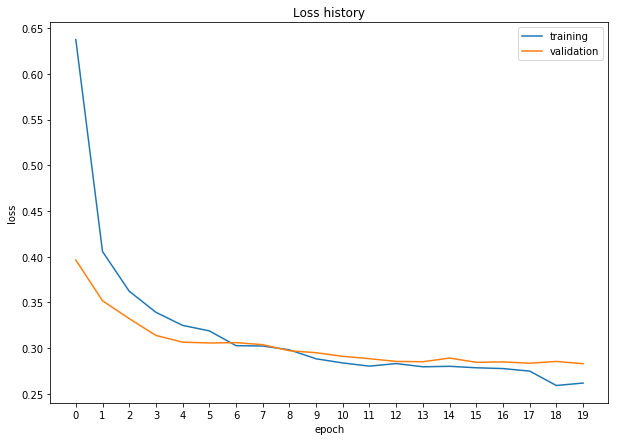

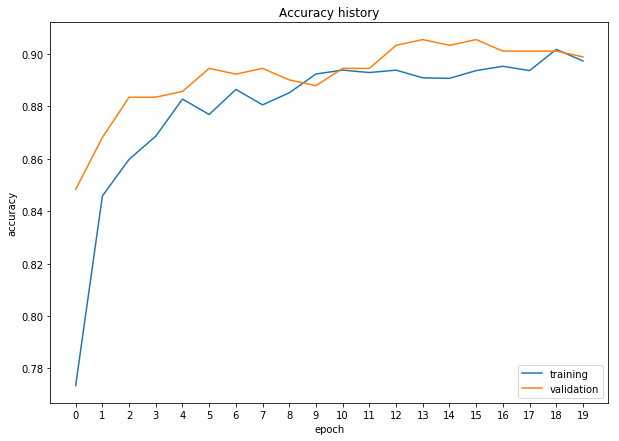

In [6]:
# plot model training history
c2t.plot_history(history)

In [7]:
# evaluate model on downsampled val set
model_paths = {'model': filepath}
model_metrics = c2t.eval_models(model_paths, valid_path)['model']

Building image generator...
Found 455 images belonging to 5 classes.
Loading model models/downsample_model2.h5
Evaluating model models/downsample_model2.h5
Evaluation complete.



In [8]:
c2t.print_eval(model_metrics)

accuracy: 0.8989010990320981
loss: 0.28292308404330757
pcr: [0.86813187 0.93406593 0.86813187 0.97802198 0.84615385]
mean pcr: 0.8989010989010989
confusion matrix:


[[79, 7, 4, 0, 1],
 [3, 85, 1, 1, 1],
 [3, 3, 79, 1, 5],
 [1, 0, 1, 89, 0],
 [0, 1, 12, 1, 77]]

In [9]:
# evaluate model on larger validation set
valid_path_large = 'H:/springboard/other_data/yelp/Photos/final_photos/val'
model_metrics_large = c2t.eval_models(model_paths, valid_path_large)['model']

Building image generator...
Found 20000 images belonging to 5 classes.
Loading model models/downsample_model2.h5
Evaluating model models/downsample_model2.h5
Evaluation complete.



In [10]:
c2t.print_eval(model_metrics_large)

accuracy: 0.90045
loss: 0.2741796498821016
pcr: [0.90948276 0.92958175 0.83235294 0.97802198 0.84236153]
mean pcr: 0.8983601921296479
confusion matrix:


[[633, 31, 28, 2, 2],
 [525, 12224, 181, 57, 163],
 [71, 66, 3679, 23, 581],
 [1, 0, 1, 89, 0],
 [3, 8, 234, 14, 1384]]